Initial floorplan


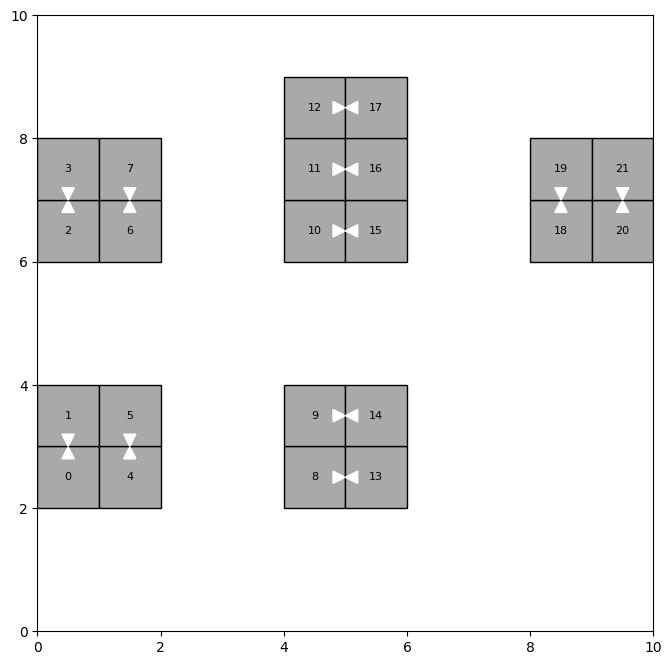

Random initial assignment


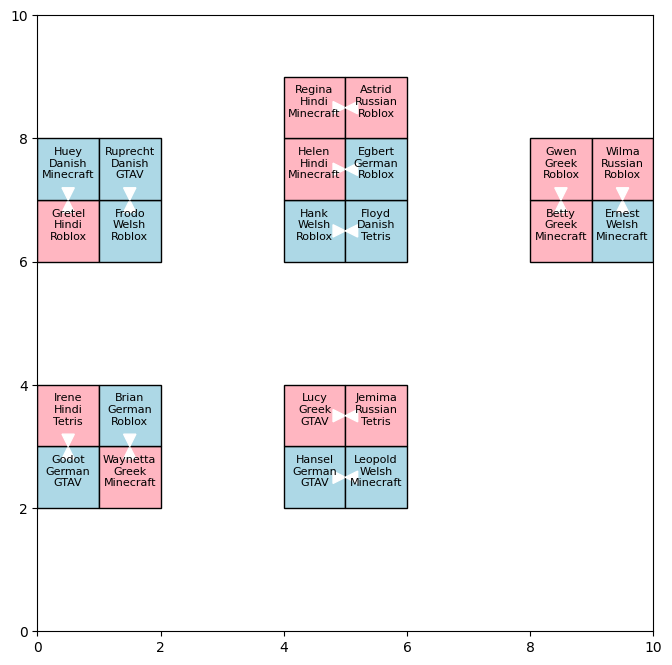

Applying rules:
	adjacent: gender = False
	adjacent: language = False
	adjacent: game = False
	opposite:gender = False
	opposite:language = False
	opposite:game = False

FAIL, no solution after 1000000 iterations, in 73.31 seconds. Throughput: 13640.6
Solution


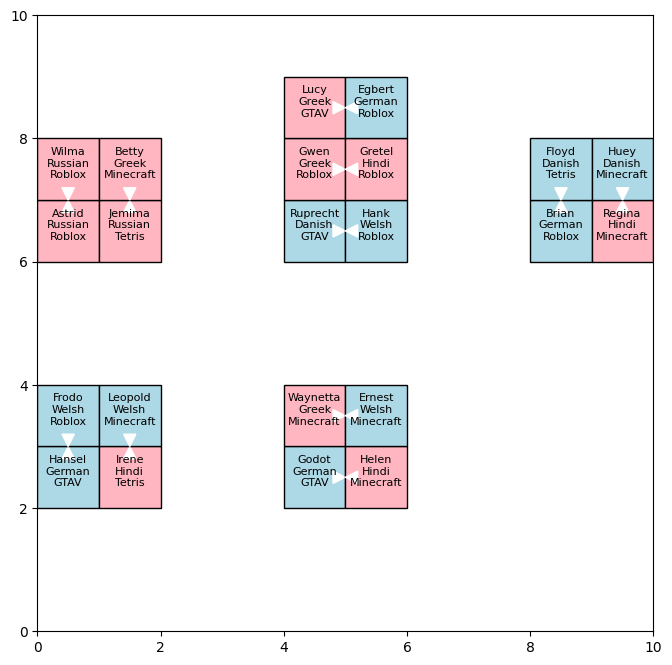

saving: solution as 04-05-2025_10:38:08_solution.svg


In [1]:
import pyseater as ps
params = ps.Parameters()
seater = ps.Pyseater(params.n_rows, params.n_cols)

seater.add_table(0, 2, ps.Table(2, 2, ps.Divide.HORIZONTAL))
seater.add_table(4, 2, ps.Table(2, 2, ps.Divide.VERTICAL))
seater.add_table(8, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))
seater.add_table(4, 6, ps.Table(2, 3, ps.Divide.VERTICAL))
seater.add_table(0, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))

seater.adj_rules.append(ps.Rule("gender", False))
seater.adj_rules.append(ps.Rule("language", False))
seater.adj_rules.append(ps.Rule("game", False))

seater.ops_rules.append(ps.Rule("gender", False))
seater.ops_rules.append(ps.Rule("language", False))
seater.ops_rules.append(ps.Rule("game", False))

print("Initial floorplan")
seater.draw_floorplan(params)
seater.do_random_assignment(params)
print("Random initial assignment")
seater.draw_floorplan(params)
seater.solve(params)
print("Solution")
seater.draw_floorplan(params, "solution")